<img src="images/TRU_Logo_Horizontal_RGB-colour37470.png" width=600 />
<!-- The line above is html code. This line is html comment, it won't affect the output -->

# Physics 2200 - Mechanics
## Project 1 - Numerical integration and differentiation

Hello, and welcome to the first computational project for PHYS-2200!

Every project will consist of a Jupyter notebook, like this one. A notebook is made of code cells. Cells can be of two types: Code or Markdown. If you click on this text, you will see to word **Markdown** apear in the toolbar above. If you click on a Code cell, the word **Code** will appear instead. Markdown cells are used for creating nicelly formated text, like this one. Code cells contain the code that actually performs the work on the notebook. You can change a cell from Code to Markdown and back using the toolbar above.

In every project, the first cells will introduce you to the type of programming that will be done. They contain examples that you can modify and run to familiarize yourself with the project. In the end, you will find instructions on the programming you must do yourself to get credits for this project.

Here is our very first cell of code:

In [1]:
import matplotlib.pyplot as plt
import PhysPlot
import numpy as np

All it does, is to load a few code libraries that we will be using. Code libraries contain python commands (functions and classes) that we can use without having to code it all from scratch ourselves. These commands will always be on our notebooks and you don't have to worry about them, beyond making sure they are run before any other cells in the notebook.

To run a cell, click on it and then on the *"play"* button on the toolbar above. Alternatively, you can just press *Shift + Enter*.
After running a Code cell, you should see a number on the brackets beside it. If it is the first cell you run in this session, the number will be 1.

Here is another code cell. In this one, we define two quantities for a particle: the velocity **$v$** and the initial position $x_0$. Then these quantities are used to compute the position at time $t=7$ (assuming constant velocity). Finaly, the result is printed out.

In [2]:
# Define velocity, initial position and final time.
v = 5
x0 = 3
tf = 6

# Compute final position and print result.
x = x0 + v * tf
print(x)

33


Notice that any code that comes after a *hashtag* is treated as a *comment* by the Python interpreter and does not affect the results. 
Try changing the value of the final time, and re-run the cell to see the result.


## Plots

One of the most useful scientific tasks that can be performed on a computer is graphing. Computers do this by finding the values of a function at many discrete points and then plots those points. For this we will be using the python package matplotlib (Mathematical plotting library). To get started, we will take the above position function and plot how the position changes over time. To do this, we need to create two arrays, an array is just a long list of numbers. Arrays are sometimes called vectors and, although they can represent physical vectors, we will not be using arrays as vectors just yet.

The first array will hold the time axis, this will typically be defined from $t = 0$ to $t = t_f$. The second array will hold the function values at the various time steps (note that computers cannot really plot continuous functions, only dicret points).

In [3]:
# The following two lines of code use functions from the "numpy" library to create arrays.
# This is an array that runs from 0 to tf, which we defined above as 6, with increment steps of 0.03.
t = np.arange(0, tf, 0.03)

# The second array is made only of zeroes and has the same number of elements that the
# array "t" has. This number can be obtained for any array with the function len()
x = np.zeros(len(t))

If we were to plot the arrays as is, we would only get the zero function. This is because the values of x are all zero. We need to populate x with appropriate values. How do we do that? Loops. We will use a "for" loop. The loop will iterate through x assigning each value according to the kinematic equation for position.

In [4]:
for i in range(len(x)):
    x[i] = x0 + v * t[i]

Notice the elements being iterated on by the loop are indented. The indented values are the scope of the loop. If there were any non-indented lines after the loop, these would be out of the loop. This means they would be run only once, after the loop is finished. 

Next, we plot the arrays in two different ways. The first cell implements the necessary commands to create the plot with the tools of the **matplotlib** library (abreviated *plt* here). The second cell simply calls a plot command from our own code library **PhysPlot**. **PhysPlot** simply implements the same matplotlib commands on the background, so you don't have to worry about it and can focus on the Physics. If you would like to learn matplotlib, you are wellcome to make the plots yourself. You can always take a look at the *PhysPlot.py* file to see what we have implemented.

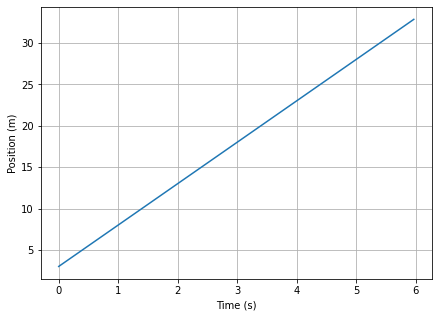

In [5]:
# Creating the plot from scratch with matplotlib (plt)
plt.figure(figsize=(7, 5))
plt.plot(t, x) # Plots the graph, with t on the x-axis, x(t) on the y-axis
plt.xlabel("Time (s)") # gives the x-axis title
plt.ylabel("Position (m)") # gives the y-axis title
plt.grid() # displays the gridlines

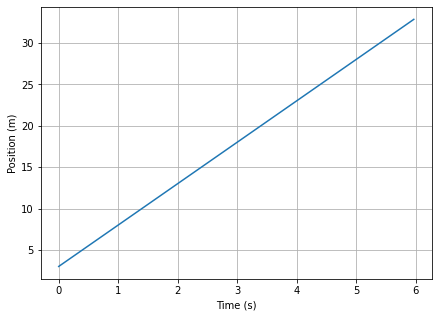

In [6]:
# Does the same thing as the above code but in one line.
PhysPlot.plot(t, x, "Time (s)", "Position (m)") 

Notice the two plots are the same but using the **PhysPlot** method is easier than using matplotlib. However, we are simply implementing the same matplotlib methods in PhysPlot. So, for this course you have the choice of either using matplotlib and having the ability to customize your graphs to your liking (a usefull skill, but a lot more time consuming) or you can use **PhysPlot** provided to save time and have consistent plots throughout.

If you do use matplotlib, keep in mind the ordering in the above code. The order matters.

# Numerical solution to Fluid Resistance
Fluid Resistance is a force that depends on the velocity of the object. We will study three models for this dependence: linear, quadratic, or a combination of both. In general, $F(v) = -c_1v-c_2v|v|$.

The goal for this section is for you to integrate using python. Remember that integration is the limit of a sum. With a computer, we aim to approximate that limit by summing a large (albeit not infinite) number of small increments. This is called a *numerical* solution. The simplest method for doing this is the Euler method, which we will see next.

## Linear Fluid Resistance

Let's solve the **linear** air drag free-fall problem numerically using Euler method. The differential equation reads (choosing positive to be downward):

$m \frac{dv}{dt} = -c_1 v + mg$

We solved this in class and got the result:

$v = v_t \left( 1 - e^{-t/\tau} \right) + v_0 \, e^{-t/\tau}$

where $v_t = \frac{mg}{c_1}$ is the *terminal velocity* and $\tau = m/c_1$ is called the *time constant*.

When solving ODEs analytically, we usually solve for the general function first and then apply initial conditions to determine the integration constants. When solving numerically, we usually adopt a "crawling forward" approach starting with the initial conditions.

Say the initial conditions for this problem are $v_0$ and $x_0$ (we only need $v_0$ in this case). Now we want to "crawl" one "step" forward with our solution, to find the velocity at the next time "step", $v_1$. To do this, we take a small enough time step so that we can approximate the acceleration to be constant during this period:

$a = \frac{dv}{dt} \quad \rightarrow \quad a = \frac{\Delta v}{\Delta t} \quad \rightarrow \quad \Delta v = a \Delta t $

therefore,

$v_1 = v_0 + a_0 \Delta t$

or, the same equation with explicit time dependence

$v(t_1) = v(t_0 + \Delta t) = v(t_0) + a(t_0) \Delta t$

This looks logical enough, but notice there is a simplification here: $a(t)$ is a function of time and it will change during the time step $\Delta t$, however small. We are choosing to approximate the acceleration as a constant during this time. And more, we are choosing to use the value of $a(t)$ at the beginning of the time step as our constant. This is the Euler method and, although it looks simple and intuitive, we will see later that there are sometimes better options. The figure below illustrates the errors involved in the method Notice the differentce betwen the blue and yellow curves at $t_{i+1}$.

<img src="images/euler.jpg" width=500 style="float:right"/>

We will discuss the errors introduced by numerical solutions in more detail below.

Notice that, to find $v_1$, we need $a_0$, in adition to $v_0$. You can calculate the acceleration at the starting time using the differential equation for the problem:

$a_0 = a(t_0) = \left(\frac{dv}{dt}\right)_0 = - \frac{c_1}{m} v_0 + g$    

What to use for $\Delta t$? It is actually up to you. The size of the time steps $\Delta t$ determine how fast we crawl forward with the solution. In general, the smaller the time step you pick, the more accurate the code is, but also the slower it is to compute the solution (more steps to go over). As a rule of thumb, you should use as small a time step as you can.

We can generalize the above equations so they apply to an arbitrary step $n$. The general equations for Euler's Method for the velocity in this problem are:

$v_{n+1} = v_n + a_n\Delta t$

$a_n = - \frac{c_1}{m} v_n + g$

To summarize: at any step $n$, you can use the velocity at that step $v_n$, to calculate the acceleration $a_n$ (second equation). Then use the acceleration to calculate the velocity at the next step $v_{n+1}$. This proceedure continues untill we have calculated the velocity for all the times of interest.

### Unit Re-scaling 

One issue we are often faced with, when computing numerical solutions is rounding error. Computers can store numbers with enormous, but not infinite, precision. For this reason, it is good practice to keep the numbers being calculated to reasonable ranges (usually as close to 1 as possible).

This can easily be achieved by re-scaling the equations so that all the quantities are written in terms of "typical values" in the problem. Let's see how this is done in the present case.

Here a good choice is to measure time in units of the time constant $\tau$, and the velocity in units of the terminal velocity $v_t$:

$T = t / \tau \qquad u = v / v_t$

Where $v_t = \frac{mg}{c_1}$ and $\tau = m/c_1$.

Applying this for the linear case of fluid resistance, we get $a = \frac{du}{dT} = 1-u$ (Try deriving this equation yourself, from the original differential equation). 

In these units, the velocity will converge to 1 (in units of the final velocity), and it should take a time of order a few (4 or 5, in units of the time constant) for the velocity to converge. The final, re-scaled equations are:

$u_{n+1} = u_n + a_n \Delta T$.

$a_n = 1-u_n$

This is implemented in the code cell below. Inspect the code and make sure you understand what every line is doing.

One important aspect of Python is indentation. Look at the **for** loop. The two lines below it a **indented** four spaces to the right. This indicates to the Python interpreter that these lines are inside the loop (without the need for brackets). If you remove the indentation of the second line you remove it from the loop. Every line after that would be out of the loop as well.

In general, in Python, you should only indent lines that are inside of syntaxe elements such as **for** loops and functions.

In [7]:
# Euler Method integration of Linear Fluid Resistance

dt = .001                      # Size of time steps.
tf = 5                         # Final time (in units of tau). Solution will be calculated up to this point.
u0 = 0                         # Initial condition, velocity at time 0.
t = np.arange(0, tf, dt)       # Values of every time point to compute the solution at. From start to stop in steps of dt
u = np.zeros(len(t))           # Creates an array the same size as t that is all zeroes. Will contain the solutions to the velocity at every time step.
u[0] = u0                      # Assign the value of the first entry of the velocity array with the initial condition. Python arrays are zero-based.

for i in range(0, len(t)-1):   # This is how you create an iterator loop in Python.
    a = 1 - u[i]               # Normalized Linear equation for the acceleration.
    u[i+1] = u[i] + dt * a     # This is Euler's method. Assigning the next value of the velocity.

The code cell above implements the Euler method. The velocity of the object for every time point is now stored in the array $u$. You can evaluate the array $u$ to see some of the values, jut type $u$ and run the cell:

In [8]:
u

array([0.        , 0.001     , 0.001999  , ..., 0.99325868, 0.99326543,
       0.99327216])

A better way to see the results is to plot them. In the code cell below, we plot the result of our numerical calculation as well as the exact analytic result. The third plot shows both lines together and the fourth plot shows the difference between the numerical and the exact solutions.

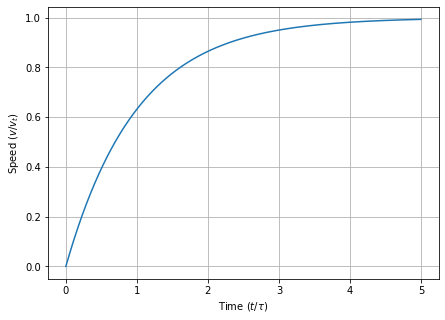

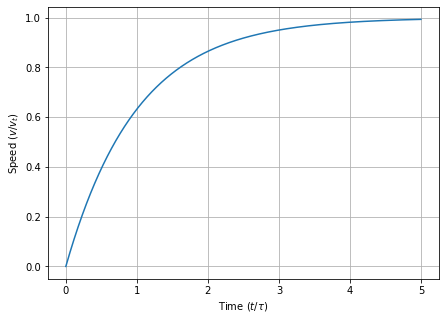

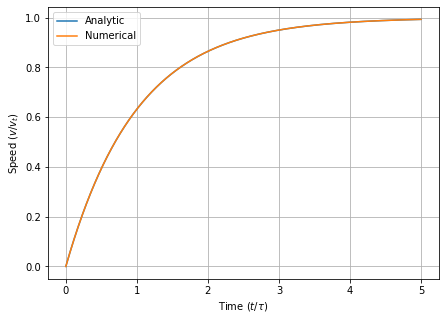

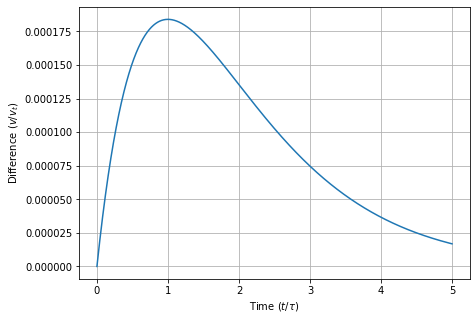

In [9]:
# This is the analytical solution. We will use it to compare to our numerical solution.
def linear_analytic_v(u0, T):
    # u0 is the initial velocity in units of terminal velocity
    # T is an array of times in units of the time constant tau
    return (u0 - 1) * np.exp(-T) + 1

# Plot analytic and numerical solutions
PhysPlot.plot(t, linear_analytic_v(u0,t), r"Time ($t/\tau$)", r"Speed ($v/v_t$)")
PhysPlot.plot(t, u, r"Time ($t/\tau$)", r"Speed ($v/v_t$)")
# This is used to plot two or more curves in a single graph. The first argument is the x-axis array, 
# the second argument is a list with as many y-axis arrays as wanted. The third argument is a list of the same size
# With labels for aech y-axis array. The last two arguments are the axes titles.
PhysPlot.multiplot(t, [linear_analytic_v(u0, t), u], ["Analytic", "Numerical"], r"Time ($t/\tau$)", r"Speed ($v/v_t$)")

# Plot the difference between Numerical and Analytic Solution.
PhysPlot.plot(t, u-linear_analytic_v(u0,t), r"Time ($t/\tau$)", r"Difference ($v/v_t$)")

We can see that Euler's method is quite precise for our choice of time step (0.001 of the time constant). The maximum error (difference plot) is about 0.0001, so 0.01% of the final velocity, pretty good! Try changing the size of the time step and see how it affect the error (maximum of the difference plot). How big must you make the time step, so you can see two separate curves in the multyplot (third plot)?

In this first, simple case, we can find the analytical solution, so we can compute the error exactly by taking the difference. Most of the time, we will not be able to compute the analytical solution, and the numerical solution will be our only option. It is important to keep in mind, however, that numerical solutions introduce errors, and this errors grow with the size of the time step.

## Problem 1 - Quadratic Fluid Resistance (1 point)

Now that you have seen the linear fluid resistance solution, the next step is for you to figure out the quadratic fluid resistance. Remember that, in this case, the differential equation is given by:

$m \frac{dv}{dt} = -c_2 v^2 + mg$

where we have adopted downward as positive and the equation is only valid for downward initial velocities.

We have solved this analytically in class, so you can compare your numerical results to the analytical solution (notice this equation has a typo in the text):

$v = v_t \tanh \left( \frac{t}{\tau} + \tanh^{-1} \frac{v_0}{v_t} \right)$

where the terminal velocity is given by $v_t = \sqrt{\frac{mg}{c_2}}$ and the time constant by $\tau = \sqrt{\frac{m}{c_2 g}}$.

Here are the steps you should follow to solve this:
  1) Re-scale the differential equation in terms of $v_t$ and $\tau$.
  2) Write the numerical equations for the Euler method. There will be two equations: one for $a_n$ as a function of $v_n$ (this will be different then the linear case) and one for $v_{n+1}$ as a function of $a_n$ and $v_n$ (this will be the same as for the linear case).
  3) Write the code to find the numerical solution and compare it to the analytic solution. You can copy the code cell we used for the linear solution. The only thing that need to change is one line inside of the for loop.
  4) Create the same plots that we did for the linear case, including the difference between numerical and analytic solutions. Naturaly, you need to create a new function for the analytic solution. To do this, you will need the python code for hyperbolic tangent and its inverse: **np.tanh()** and **np.arctanh()**. (Remember to re-write the analytic solution in the re-scaled units). 
  5) What is the maximum value for the error? Try changing the time step to see how the error grows. How big do you need to make the time step, to get an error of order 1% (0.01)?

In [10]:
# Here goes your code for the Euler method integration of Quadratic Fluid Resistance.
# You should copy most of the code cell for the linear case as a start. Then make the few changes necessary.



In [11]:
# Here goes your code to make plots and compare to the analytic solution.



## Problem 2 - Solve the Full Fluid Resistance Equation (2 points)

Now we will tackle the full fluid resistance equation, containing botha linear and a quadratic term. We do not have an analytical solution for this case, so here a numerical solution is our only option. The differential equation is given by (valid for downward velocities):

$m \frac{dv}{dt} = -c_1 v -c_2 v^2 + mg$

In this case, we cannot easily get rid of the constants $c_1$ and $c_2$ in favor of $v_t$ and $\tau$. So we need to wrok with actual numbers. The text give approximate values for $c_1$ and $c_2$ for spherical objects in air. In SI units, we have:

$c_1 = 1.55 \times 10^{-4} D$

$c_2 = 0.22 \, D^2$

where $D$ is the diameter of the sphere. 

We will do our calculations for a spherical raindrop of diameter $D=0.5 mm$. Find the values of $c_1$ and $c_2$ and use the density of water to find the mass of the raindrop. Write the numerical equations for the Euler method. Don't worry about re-scaling here. Use $g=9.807 m s^{-2}$.

Since we don't know what the characteristic time will be in this case, you will have to explore a bit to find what the time step should be and for how long (final time) you should integarte. If you pick a final time that is too small, the velocity will not reach the terminal value. If you pick a final time that is too large, it will reach it in the first few steps and be constant after that. You should pick a final time so that you can see the velocity gradually approach the terminal value in your graph.

Since we don't have an exact solution, how do you know you have chosen a time step small enough to have minimal errors? A good trick is this: start with a large time step. As you decrease it, your result will change because the errors get smaller. Keep reducing the time step size. When your results stop changing appreciably, it means you have reached a good enough time resolution. In this case, we say that the solution has "converged". 

Here is another way to check your results. In problem 2.15 you derived an expression for the terminal velocity of the linear + quadratic case. Use that expression to calculate the terminal velocity and compare to what you get numerically!

Finally, let's show that in the case of this raindrop, neither a linear nor a quadratic only approximation would be adequate. To do this, plot the analytical solutions for the linear and for the quadratic cases together with your numerical solution for the full case. Use the same values for $c_1$, $c_2$ and $m$ in all cases. Which model takes longer to reach terminal velocity? Which model has the largest terminal velocity? Which model has the smallest terminal velocity?

In [12]:
# Here goes your code for the solution of problem 2.
# Some of it can be copied from previous cases.



In [13]:
# Here goes your code for generating the suggested plots for problem 2.



## Position

You might be interested in the object's position as a function of time, as well as its velocity. We have been able to ignore the position untill now because we were dealing with forces that depend only on velocity.

To calculate positions using the Euler method is a straightforward extension of what we have already seen. In the same way that you get the velocity at the next time point from the acceleration at the current time point:

$a = \frac{dv}{dt} \quad \rightarrow \quad v_{n+1} = v_n + a_n\Delta t$

you can get the position at the next time point from the velocity at the current time point:

$v = \frac{dx}{dt} \quad \rightarrow \quad x_{n+1} = x_n + v_n\Delta t$

In this way, you could modify all of your code blocks above to include another array $x$ and to have another line inside the *for* loop calculating positions. Naturally, you would need to give an initial position as well as an initial velocity, in this case. You will need to use this to solve the next (and final) problem in this project.

## Problem 3 - Solve C2.1 (3 points)
Solve problem C2.1 from the textbok. You will need to solve parts b), c) and d) numerically. For this, you will have to compute the position, as well as the velocity, at each time point. This is explained in the paragraph above.

In [14]:
# Solve C2.1 from the textbook here.

### Part (a)

### Part (b)

### Part (c)